In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import numpy as np
%matplotlib inline
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [27]:
df = pd.read_csv("dataset_final.csv")

/tmp/ipykernel_40121/1790750345.py:1: DtypeWarning: Columns (2,3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_final.csv")


In [28]:
df.shape

(843836, 26)

In [29]:
df.dtypes

id                       object
name                     object
album                    object
album_id                 object
time_signature           object
release_date             object
track_genre              object
primary_artist           object
secondary_artists        object
primary_artist_id        object
secondary_artist_ids     object
decade                  float64
content                  object
danceability            float64
energy                  float64
key                     float64
loudness                float64
mode                    float64
speechiness             float64
acousticness            float64
instrumentalness        float64
liveness                float64
valence                 float64
tempo                   float64
duration_ms             float64
year                    float64
dtype: object

In [30]:
df.dropna(subset=['primary_artist','primary_artist_id'], inplace=True)

In [31]:
# df.to_csv("dataset_final.csv", index=False)

In [32]:
df.shape

(843836, 26)

In [33]:
df.isnull().sum()

id                           0
name                         0
album                    44260
album_id                 44260
time_signature               0
release_date                 0
track_genre             716183
primary_artist               0
secondary_artists       692555
primary_artist_id            0
secondary_artist_ids    704373
decade                       0
content                      0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
duration_ms                  0
year                         0
dtype: int64

In [34]:
X = df.select_dtypes([np.number])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca_test = PCA()
pca_test.fit(X_std)
pca_test.explained_variance_ratio_

array([0.23781437, 0.14438795, 0.09422695, 0.0852068 , 0.08120892,
       0.06725029, 0.06239449, 0.05980357, 0.05462004, 0.05154452,
       0.02848701, 0.02247794, 0.00856067, 0.00201648])

Text(0, 0.5, 'Cumulative Explained Variance')

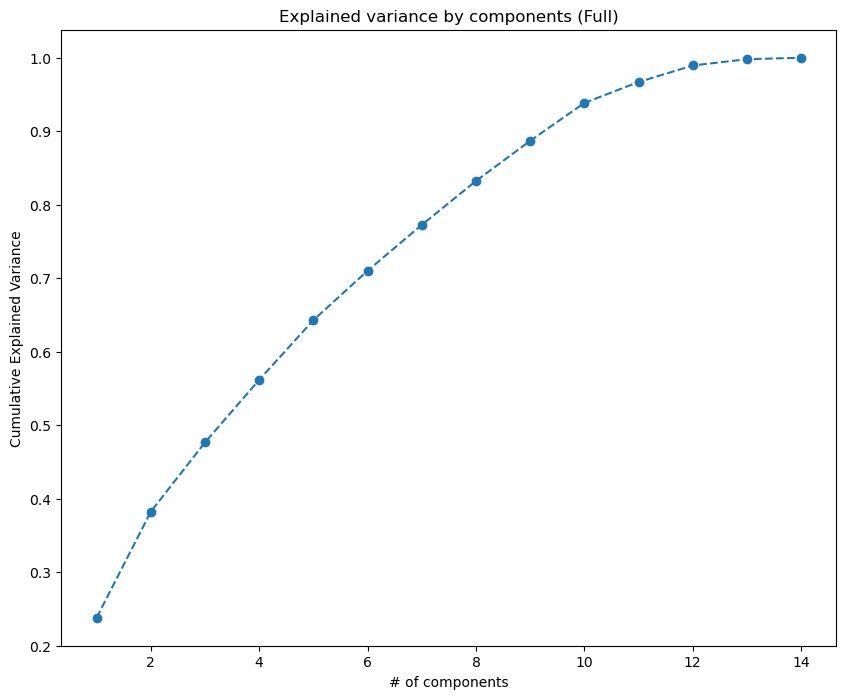

In [35]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,15), pca_test.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components (Full)')
plt.xlabel('# of components')
plt.ylabel('Cumulative Explained Variance')

In [36]:
PCA_COMPONENTS = 10

In [37]:
pca_test = PCA(n_components=PCA_COMPONENTS)
pca_test.fit(X_std)
X_pca = pca_test.transform(X_std)
print(X_pca)

[[-1.75787861  1.23255855  1.14982447 ...  0.00324161  0.17089385
  -0.14783943]
 [-1.82541651  1.31387443  0.23837016 ...  0.67593726  0.10507718
  -1.52183267]
 [-1.76445898  0.95157391  0.84444396 ...  1.26156271 -1.20568821
  -3.00510443]
 ...
 [-1.19830754 -1.50024299 -0.58950694 ...  0.54228931  0.01235354
   0.09050407]
 [-1.21283691 -1.27037886 -1.573261   ...  0.2223088  -0.68576154
  -0.77994382]
 [-2.44545288 -0.91946812 -1.16641591 ...  0.67111984  0.18466406
   0.06588556]]


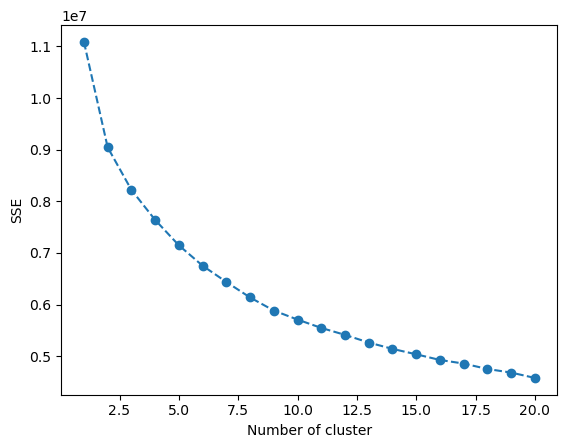

In [38]:
res = {}
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, random_state=46)
    kmeans_pca.fit(X_pca)
    res[k] = kmeans_pca.inertia_  # Plotting the curve with 'k'-value vs SSE
plt.plot(list(res.keys()), list(res.values()), linestyle="--", marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [39]:
CLUSTER_COUNT = 3

In [40]:
kmeans_pca = KMeans(n_clusters=CLUSTER_COUNT, random_state=46)

In [41]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=46)

In [42]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
df_pca_kmeans.columns.values[-10:] = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
df_pca_kmeans["cluster_label"] = kmeans_pca.labels_
df_pca_kmeans.columns.values

array(['id', 'name', 'album', 'album_id', 'time_signature',
       'release_date', 'track_genre', 'primary_artist',
       'secondary_artists', 'primary_artist_id', 'secondary_artist_ids',
       'decade', 'content', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'cluster_label'],
      dtype=object)

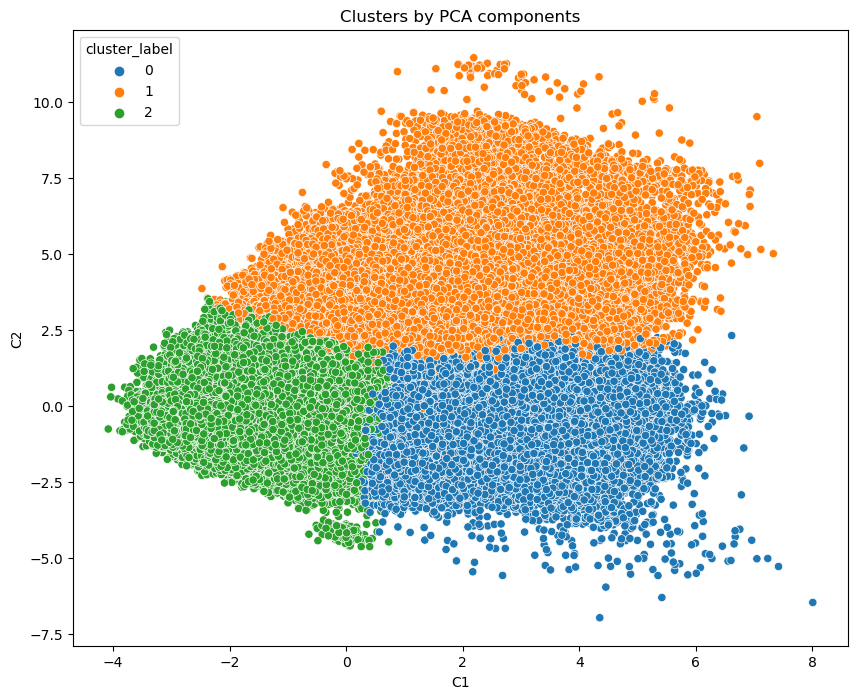

In [43]:
x_axis = df_pca_kmeans['C1']
y_axis = df_pca_kmeans['C2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans["cluster_label"], palette="tab10")
plt.title('Clusters by PCA components')
plt.show()

In [44]:
df_pca_kmeans['cluster_label'] = df_pca_kmeans['cluster_label'].apply(lambda x: f"CLSTR{x}")

In [45]:
df_pca_kmeans['cluster_label'] 

0         CLSTR2
1         CLSTR2
2         CLSTR2
3         CLSTR2
4         CLSTR2
           ...  
843831    CLSTR2
843832    CLSTR2
843833    CLSTR2
843834    CLSTR2
843835    CLSTR2
Name: cluster_label, Length: 843836, dtype: object

In [48]:
df_pca_kmeans.cluster_label.value_counts()

cluster_label
CLSTR2    526221
CLSTR0    268547
CLSTR1     49068
Name: count, dtype: int64

In [49]:
df_pca_kmeans.to_csv("dataset_final", index=False)

# Dataset that has valid genres only

In [50]:
df.dropna(subset=['track_genre'], inplace=True)

In [51]:
df.shape

(127653, 26)

In [52]:
# df[df['name'].str.contains("CLSTR")]

CLUSTERING REDUCED DATASET

In [53]:
X = df.select_dtypes([np.number])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca_test = PCA()
pca_test.fit(X_std)
pca_test.explained_variance_ratio_

array([0.26354645, 0.1471922 , 0.08636241, 0.08510989, 0.08011307,
       0.06618084, 0.06223388, 0.05833403, 0.05118404, 0.04962905,
       0.02457779, 0.01801283, 0.00647248, 0.00105104])

Text(0, 0.5, 'Cumulative Explained Variance')

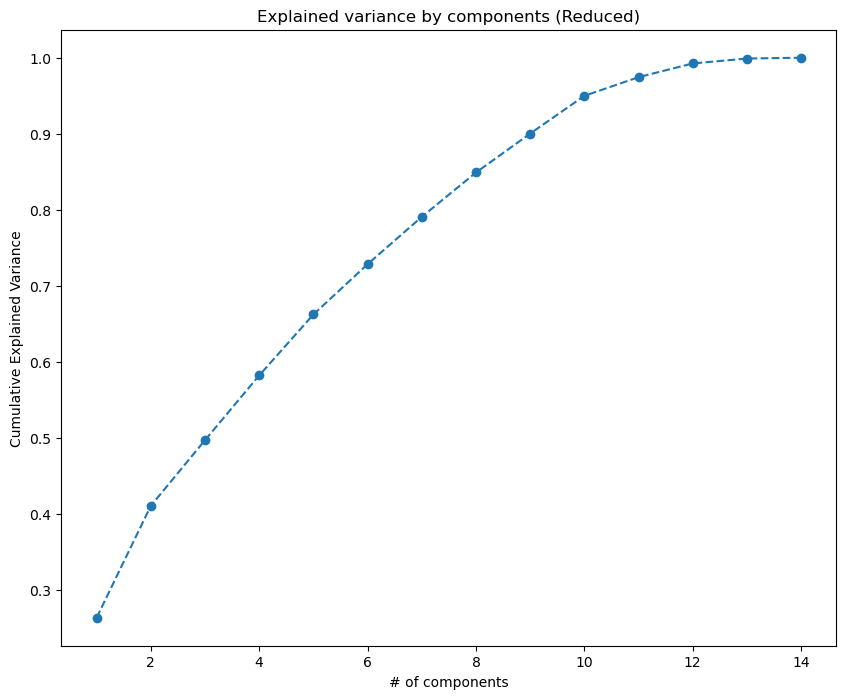

In [54]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,15), pca_test.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components (Reduced)')
plt.xlabel('# of components')
plt.ylabel('Cumulative Explained Variance')

Will be using 10 components for PCA

In [55]:
PCA_COMPONENTS = 10

In [56]:
pca_test = PCA(n_components=PCA_COMPONENTS)
pca_test.fit(X_std)
X_pca = pca_test.transform(X_std)
print(X_pca)

[[-2.01801229  0.54718636  0.39576232 ... -0.63506232 -0.15998979
  -0.18171223]
 [-2.13846043  0.59704638  0.58017377 ...  0.00375282  0.97054315
  -1.06992694]
 [-2.1420152   0.10985571  2.07171474 ...  1.44451497  3.05332263
  -1.49018262]
 ...
 [-0.26123789 -1.64905637 -0.44206559 ... -0.0153696   0.81630674
   0.6802351 ]
 [-1.44599607 -1.2849907   0.27003856 ...  0.71240241  1.21791054
  -0.12795615]
 [-2.53265202 -0.87043069 -0.95079991 ...  0.39730083 -0.00540222
   0.08453519]]


Finding ideal cluster amount in kmeans

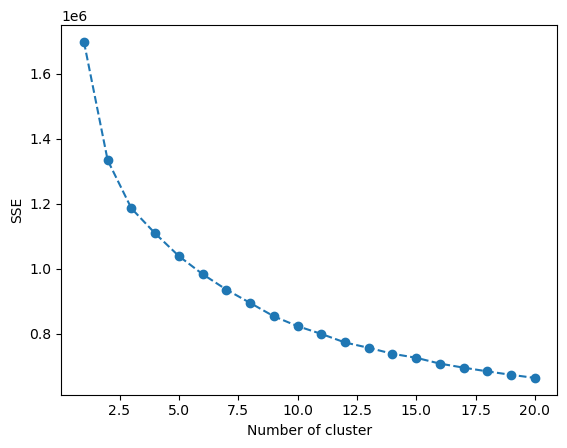

In [57]:
res = {} 
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, random_state=46)
    kmeans_pca.fit(X_pca)
    res[k] = kmeans_pca.inertia_  # Plotting the curve with 'k'-value vs SSE
plt.plot(list(res.keys()), list(res.values()), linestyle='--', marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Will be using 3 clusters for Kmeans

In [58]:
CLUSTER_COUNT = 3

In [59]:
kmeans_pca = KMeans(n_clusters=CLUSTER_COUNT, random_state=46)

In [60]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=46)

In [61]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
df_pca_kmeans.columns.values[-10:] = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
df_pca_kmeans["cluster_label"] = kmeans_pca.labels_
df_pca_kmeans.columns.values

array(['id', 'name', 'album', 'album_id', 'time_signature',
       'release_date', 'track_genre', 'primary_artist',
       'secondary_artists', 'primary_artist_id', 'secondary_artist_ids',
       'decade', 'content', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'cluster_label'],
      dtype=object)

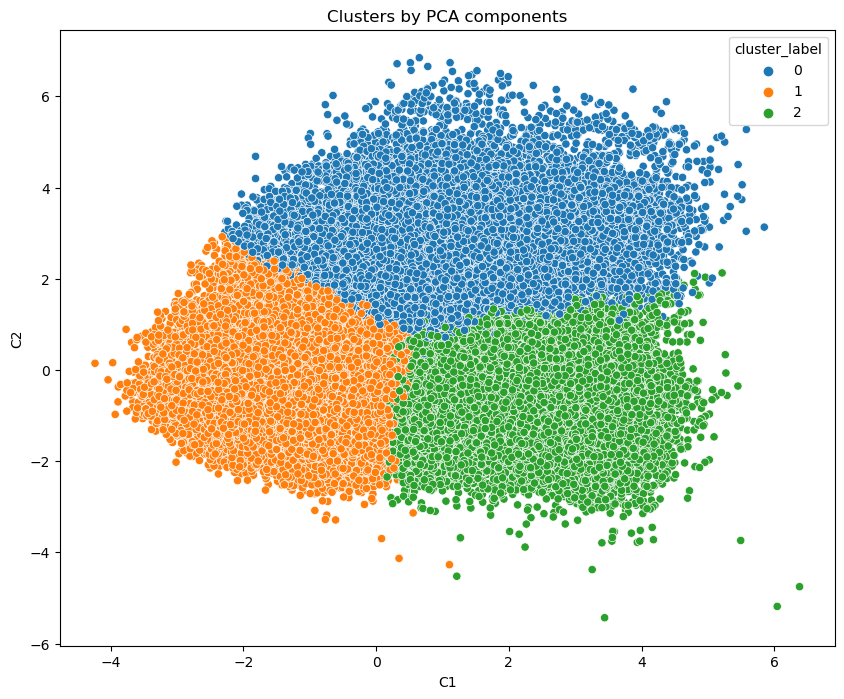

In [62]:
x_axis = df_pca_kmeans['C1']
y_axis = df_pca_kmeans['C2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans["cluster_label"], palette="tab10")
plt.title('Clusters by PCA components')
plt.show()

In [63]:
df_pca_kmeans['cluster_label'] = df_pca_kmeans['cluster_label'].apply(lambda x: f"CLSTR{x}")

In [64]:
df_pca_kmeans.cluster_label.value_counts()

cluster_label
CLSTR1    70128
CLSTR2    41230
CLSTR0    16295
Name: count, dtype: int64

In [67]:
df_pca_kmeans.head()

,id,name,album,album_id,time_signature,release_date,track_genre,primary_artist,secondary_artists,primary_artist_id,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,cluster_label
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.547186,0.395762,0.859349,-0.370996,-0.365872,0.993075,-0.635062,-0.159990,-0.181712,CLSTR1
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.597046,0.580174,0.064476,0.723113,-0.030494,1.520801,0.003753,0.970543,-1.069927,CLSTR1
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.109856,2.071715,1.068905,-0.580562,-0.224326,0.060600,1.444515,3.053323,-1.490183,CLSTR1
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.342092,1.332853,0.351343,2.072844,0.368062,0.233097,-0.425305,1.194927,-0.707170,CLSTR1
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.428398,-0.972592,0.590311,-0.900114,0.003717,-0.205163,-0.627061,0.720222,-0.568308,CLSTR1


In [66]:
df_pca_kmeans.to_csv("dataset_final_reduced", index=False)